In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [0]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-01 20:32:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   240KB/s    in 0.3s    

2020-06-01 20:33:00 (240 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
dataFrame = pd.read_csv("FuelConsumption.csv")

dataFrame.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [0]:
msk = np.random.rand(len(dataFrame)) < 0.8
msk

array([ True,  True,  True, ..., False,  True, False])

In [0]:
from sklearn import linear_model

fields = ["ENGINESIZE", "FUELCONSUMPTION_COMB_MPG"]

X = dataFrame[fields]
Y = dataFrame["CO2EMISSIONS"]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

y_pred = regr.predict(X_test)

In [0]:
print( "y_pred: " + str(y_pred[1]) + ", Y_test: " + str(Y_test[1]))

y_pred: 216.48364295212343, Y_test: 221


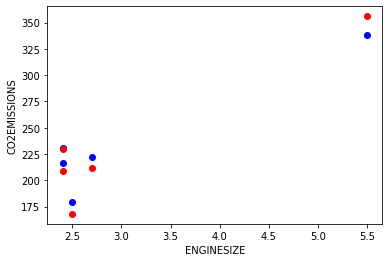

In [0]:
fig, ax = plt.subplots()
column =1;

ax.scatter(X_test["ENGINESIZE"][0:5], y_pred[0:5], color = 'blue')
ax.plot(X_test["ENGINESIZE"][0:5], Y_test[0:5], 'o', color = 'red')
ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('CO2EMISSIONS')
plt.show()